In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

In [7]:
# setup pytrends
pytrends = TrendReq(hl='en-US', tz=360)
keyword = "Data Analysis"

Data Request

In [10]:
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='',gprop='')

Country wise Interest

In [12]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

C:\Users\ram\AppData\Local\Temp\ipykernel_13996\148655320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_data[keyword], y=region_data.index, palette="Blues_d")


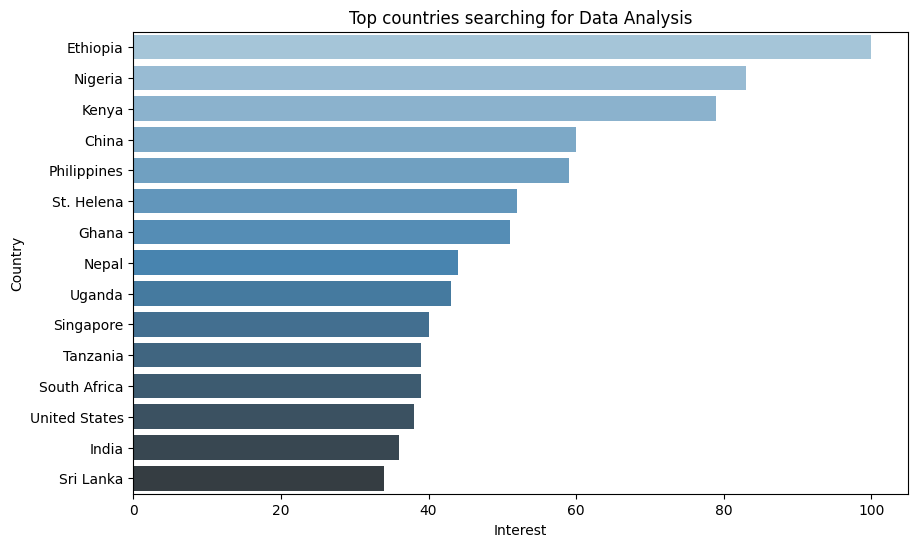

In [15]:
plt.figure(figsize=(10,6))

sns.barplot(x=region_data[keyword], y=region_data.index, palette="Blues_d")
plt.title(f"Top countries searching for {keyword}")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

World Map

In [16]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    hover_name='geoName',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title=f'Global Interest in {keyword}')
fig.show()

Time wise Interest

In [17]:
time_df = pytrends.interest_over_time()

C:\Users\ram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



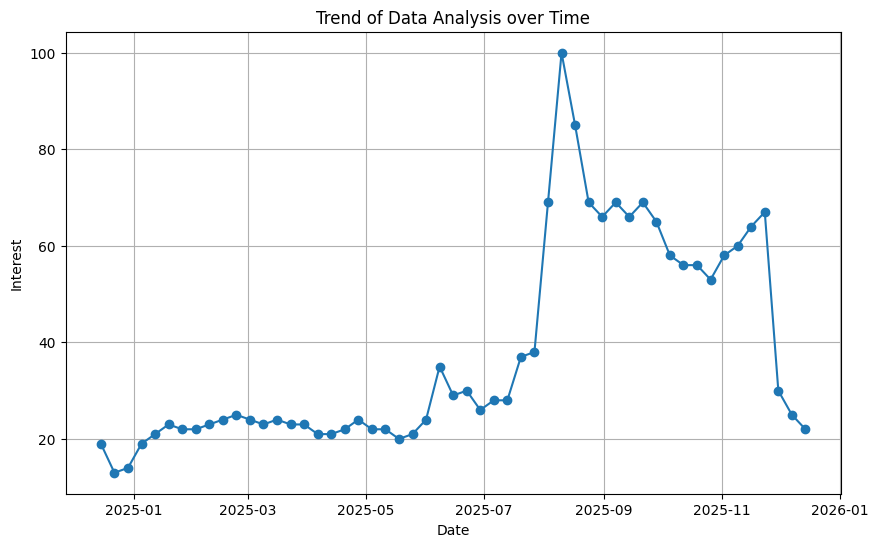

In [19]:
plt.figure(figsize=(10,6))
plt.plot(time_df.index, time_df[keyword], marker='o')
plt.title(f'Trend of {keyword} over Time')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.grid()
plt.show()

Compare Multiple Keyword

In [23]:
kw_list = ["Data Analysis", "Machine Learning", "Data Science"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

C:\Users\ram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



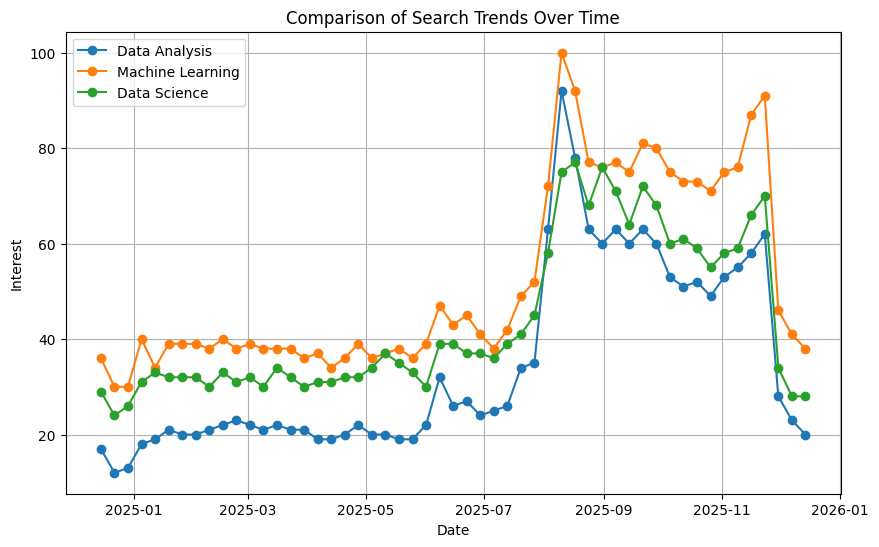

In [26]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(10,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], marker='o', label=kw)

plt.title('Comparison of Search Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Interest')
plt.legend()
plt.grid()
plt.show()